In [1]:
# init
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import sys
sys.path.append("/kaggle/input/functions/")
from FileObject import print_file_info  

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path=os.path.join(dirname, filename)
        print_file_info(file_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


文件详细信息：
文件名称:
  ▸ creditcard.csv
--------------------------------------------------
绝对路径:
  ▸ /kaggle/input/abnormal-transaction-warning-system/creditcard.csv
--------------------------------------------------
真实路径:
  ▸ N/A
--------------------------------------------------
文件类型:
  ▸ 普通文件
--------------------------------------------------
文件大小:
  ▸ 113160432 bytes
--------------------------------------------------
占用块数:
  ▸ 221024
--------------------------------------------------
IO块大小:
  ▸ 1048576 bytes
--------------------------------------------------
文件系统编码:
  ▸ utf-8
--------------------------------------------------
访问权限:
  ▸ 符号表示           : -rw-r--r--
  ▸ 八进制表示          : 0644
--------------------------------------------------
时间信息:
  ▸ 创建时间           : 2025-03-11 04:31:21
  ▸ 修改时间           : 2025-03-11 04:31:21
  ▸ 访问时间           : 2025-03-12 02:22:01
--------------------------------------------------
设备信息:
  ▸ inode编号        : 52127342426
  ▸ 设备号            : 0:54
  ▸ 硬链接数

**Main**

====================1. 数据获取与加载
====================1.1 加载数据
数据加载完毕 正常交易: 284315 条
数据加载完毕 异常交易: 492 条
====================2. 数据探索与预处理
====================2.1 处理不平衡数据
分离特征 正常交易: 284315 条
分离特征 异常交易: 492 条
采样后样本数：28431992.00% 
正常样本占比：99.83% 
异常样本占比：0.17% 
====================2.2 特征标准化
====================3. 特征工程
====================3.1 基于领域知识的特征生成
====================3.2 降维（可选）
====================4. 构建最终数据集
====================4.1 分割训练集与测试集
====================4.2 保存数据集
====================5. 验证数据集质量
====================5.1 可视化特征分布


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

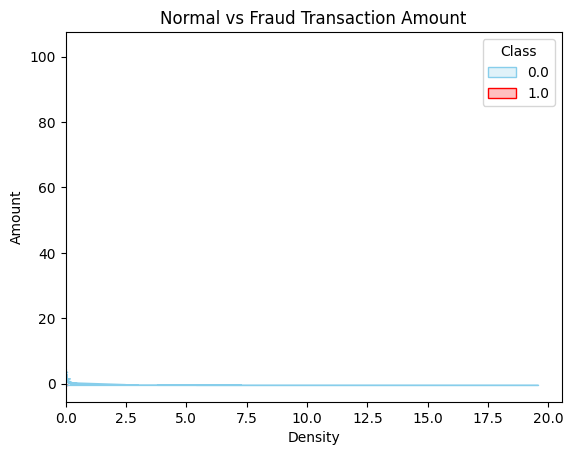

====================5.2 特征相关性分析


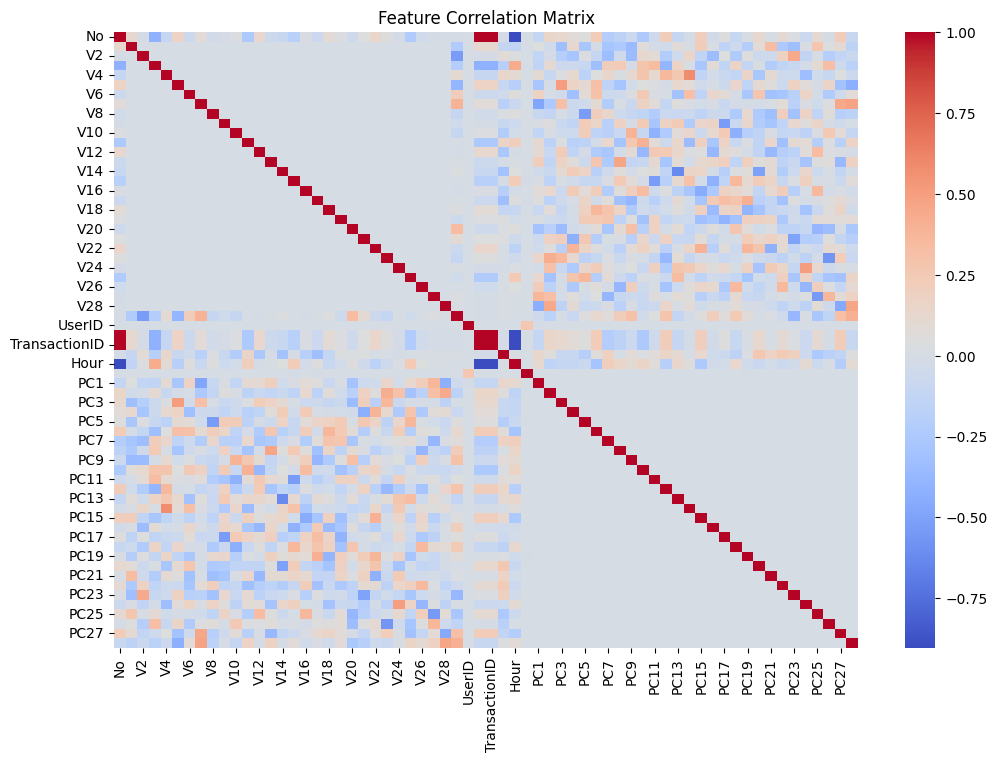

In [2]:
import pandas as pd

print("====================1. 数据获取与加载")
print("====================1.1 加载数据")
# 加载信用卡欺诈数据集（CSV格式）
data = pd.read_csv('/kaggle/input/abnormal-transaction-warning-system/creditcard.csv')
# 查看数据概况
# print(data.head())
print(f"数据加载完毕 正常交易: {data['Class'].value_counts()[0]} 条")
print(f"数据加载完毕 异常交易: {data['Class'].value_counts()[1]} 条")

print("====================2. 数据探索与预处理")
print("====================2.1 处理不平衡数据")
from sklearn.utils import resample

# ​分离特征与标签
X = data.drop('Class', axis=1)  # 特征（V1-V28、Amount、Time）
y = data['Class']               # 标签（0=正常，1=欺诈）
print(f"分离特征 正常交易: {y.value_counts()[0]} 条")
print(f"分离特征 异常交易: {y.value_counts()[1]} 条")
# ​标准化特征​（避免量纲差异影响采样效果）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ​分离多数类与少数类
# 正常交易（多数类）
normal_indices = y[y == 0].index
normal_X = X_scaled[y == 0]
# 异常交易（少数类）
fraud_indices = y[y == 1].index
fraud_X = X_scaled[y == 1]

# ​使用SMOTE生成合成样本
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
fraud_X_resampled, fraud_y_resampled = smote.fit_resample(fraud_X, fraud_indices)
print("采样后样本数：%.2f%% " % (len(fraud_X_resampled) + len(normal_X)*100))
print("正常样本占比：%.2f%% " % (len(normal_X) / (len(normal_X) + len(fraud_X_resampled))*100))
print("异常样本占比：%.2f%% " % (len(fraud_X_resampled) / (len(normal_X) + len(fraud_X_resampled))*100))

# ​合并数据集
# 合并多数类原始样本与少数类合成样本
import numpy as np
X_combined = np.concatenate([normal_X, fraud_X_resampled], axis=0)
y_combined = np.concatenate([np.zeros(len(normal_X)), np.ones(len(fraud_X_resampled))], axis=0)

# 转换为DataFrame
data = pd.DataFrame(X_combined, columns=X.columns)
data['Class'] = y_combined



print("====================2.2 特征标准化")
from sklearn.preprocessing import StandardScaler

# 标准化金额特征（Amount）
# scaler = StandardScaler()                                                        #<<<<<<<<<<<<<<<<
# 计算均值和标准差（fit:mean+std） + 标准正态分布（transform）

# print("array_Amount_values 行:%r " % (len(data['Amount'].values.astype(int))))
# print("array_Amount_values.reshape(-1, 1) 行:%r " % (len(data['Amount'].values.reshape(-1, 1).astype(int))))

# data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))     #reshape(行，列) 当行/列不定时，可以设位 -1

# 删除无关列（如时间戳Time）
# data.drop(['Time'], axis=1, inplace=True)                                       #<<<<<<<<<<<<<<< 导致下一个命令错误

print("====================3. 特征工程")
print("====================3.1 基于领域知识的特征生成")
# 生成时间窗口特征（如小时段）
data['Hour'] = data['Time'] // 3600 % 24  # 假设Time单位为秒

# 生成交易频率特征（如用户近期交易次数）
# 假设数据中有UserID列（实际需根据数据集调整）
data['RecentTxCount'] = data.groupby('UserID')['TransactionID'].transform('count')   # 分组聚合 *transform 前一个如果是多维注意lammdba是否返回Series

print("====================3.2 降维（可选）")
from sklearn.decomposition import PCA

# 对高维特征（如V1-V28）进行PCA降维
# 若0<n_components<1，则n_components的值为主成分方差的阈值； 通过设置该变量，即可调整主成分数量K；
# 若n_components≥1，则降维后的特征数为n_components；
# whiten：参数为bool型，是否对降维后的数据的每个特征进行归一化，默认是False
pca = PCA(n_components=28)
# fit(X,y=None) ：用训练数据X训练模型，由于PCA是无监督降维，因此y=None。
# transform(X,y=None) ：训练好模型后，对输入数据X进行降维。
# fit_transform(X) ：用训练数据X训练模型，并对X进行降维。相当于先用fit(X)，再用transform(X)。
# inverse_transform(X) ：将降维后的数据还原成原始数据的近似。(PCA的重建)
pca_features = pca.fit_transform(data[['V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27', 'V28']])  

# 将降维结果合并到数据集
data_pca = pd.DataFrame(pca_features, columns=[f'PC{i}' for i in range(1, 29)])  # i的范围 1- （n_components+1）
data = pd.concat([data, data_pca], axis=1)  # axis= 0(Y轴：默认)/1(x轴)

print("====================4. 构建最终数据集")
print("====================4.1 分割训练集与测试集")
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

# 分层抽样保持类别比例
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("====================4.2 保存数据集")
# 保存为CSV或Pickle
X_train.to_csv('train_features.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

print("====================5. 验证数据集质量")
print("====================5.1 可视化特征分布")
import seaborn as sns
import matplotlib.pyplot as plt
# 绘制正常与异常交易的金额分布对比
# rug ： 在轴上显示数据点分布（需配合kde使用）
# cumulative ： 是否绘制累积分布图	
# binwidth ： 单独指定柱宽而非数量	


sns.histplot(data=data, 
             y='Amount', 
             hue='Class',# 通过label区分正常/异常[1,2](@ref)
             element='step',  # 柱形样式（bars默认、step阶梯状、poly多边形）
             kde=True,  #启用核密度估计，直观展示概率密度 
             # bins=10,    #控制分箱数量，建议根据数据量调整（默认自动计算）。数字越大粒度越小
             stat='density', #统计量类型（count:默认、density:归一化、probability:概率 , percent:报告的可读性）
             palette=["skyblue", "red"]  ) #自定义颜色
plt.title('Normal vs Fraud Transaction Amount')
plt.show()

print("====================5.2 特征相关性分析")
# 计算特征相关性矩阵
corr_matrix = data.corr()
# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()



In [3]:
# Test 1
# import os

# # 检查文件路径
# file_path = "/kaggle/input/functions/FileObject.py"
# if os.path.exists(file_path):
#     print("文件存在！")
# else:
#     print("文件不存在，请检查数据集上传路径。")
    
# Test 2
import pandas as pd

d1 = [["xiaolei", 20, 10081], ["xiaowu", 30, 10082]]
t1 = pd.DataFrame(d1)
print(t1)

d2 = [["xiaowang", 22, 10083], ["xiaoming", 25, 10084]]
t2 = pd.DataFrame(d2)
print(t2)

# 默认是上下堆叠
t = pd.concat([t1, t2])
print(t)
# 左右拼接
t = pd.concat([t1, t2], axis=1)
print(t)


         0   1      2
0  xiaolei  20  10081
1   xiaowu  30  10082
          0   1      2
0  xiaowang  22  10083
1  xiaoming  25  10084
          0   1      2
0   xiaolei  20  10081
1    xiaowu  30  10082
0  xiaowang  22  10083
1  xiaoming  25  10084
         0   1      2         0   1      2
0  xiaolei  20  10081  xiaowang  22  10083
1   xiaowu  30  10082  xiaoming  25  10084


**原版SMOTE的局限性**

* 噪声敏感：若少数类样本本身存在异常值，生成的合成样本可能引入噪声。
* 边界模糊：在多数类与少数类交界区域生成样本，可能造成分类边界错误。


**改良算法**

* Borderline SMOTE
1. 原理：仅对边界样本（同时被多数类和少数类近邻包围的样本）生成合成样本，避免噪声干扰。
2. 适用场景：医学影像分类、**金融反欺诈**中的临界样本处理。
* ADASYN（Adaptive Synthetic Sampling）​
1. 原理：根据样本邻域中多数类的密度生成合成样本，密度越高生成越多，解决类别不平衡中的“硬”边界问题。
2. 适用场景：高维数据（如基因表达数据）、复杂分布的非平衡数据。

In [4]:
# SMOTE + Tomek Links
# ​流程：
#   使用SMOTE生成合成样本；
#   通过Tomek Links移除多数类与少数类邻域重叠的噪声点，清晰分类边界。
# ​优势：
#   减少过采样引入的噪声，提升模型泛化能力。
# from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [5]:
# 组合采样（SMOTEENN）​
# ​流程：
#   使用SMOTE生成合成样本；
#   通过ENN（Edited Nearest Neighbours）移除多数类噪声点。
# ​优势：
#   同时处理过采样和欠采样，简化流程
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [6]:
# SMOTE + ADASYN
# ​流程：
#   使用ADASYN生成合成样本（基于邻域密度）；
#   结合SMOTE进一步补充样本多样性。
# ​优势：
#   自适应生成样本，适用于高维、非线性可分数据。
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

* 方差     是各数据偏离平均值 差值的平方和 的平均数
* 标准差   是方差的平方根
* 均方误差（MSE）是各数据偏离真实值 差值的平方和 的平均数

In [7]:
# StandardScaler原理
from sklearn.preprocessing import StandardScaler  # 标准化工具
import numpy as np
 
x_np = np.array([[1.5, -1., 2.],
                [2., 0., 0.]])
scaler = StandardScaler()
x_train = scaler.fit_transform(x_np)
print('矩阵初值为：{}'.format(x_np))
print('该矩阵的均值为：{}\n 该矩阵的标准差为：{}'.format(scaler.mean_,np.sqrt(scaler.var_)))
print('标准差标准化的矩阵为：{}'.format(x_train))




矩阵初值为：[[ 1.5 -1.   2. ]
 [ 2.   0.   0. ]]
该矩阵的均值为：[ 1.75 -0.5   1.  ]
 该矩阵的标准差为：[0.25 0.5  1.  ]
标准差标准化的矩阵为：[[-1. -1.  1.]
 [ 1.  1. -1.]]


In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个 3 x 2 的矩阵
X = np.array([[1, 2], [3, 4], [5, 6]])

# 使用 fit_transform 方法标准化数据
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X)

# 使用 fit 和 transform 方法标准化数据
scaler = StandardScaler()
scaler.fit(X)
X_scaled2 = scaler.transform(X)

# 打印结果
print("使用 fit_transform 方法标准化的结果：\n", X_scaled1)
print("使用 fit 和 transform 方法标准化的结果：\n", X_scaled2)

使用 fit_transform 方法标准化的结果：
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
使用 fit 和 transform 方法标准化的结果：
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个 3 x 2 的矩阵
X = np.array([[1, 2], [3, 4], [5, 6]])

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 计算均值和标准差
scaler.fit(X)

# 将数据标准化为标准正态分布
X_scaled = scaler.transform(X)

# 打印结果
print("原始数据：\n", X)
print("均值：", scaler.mean_)
print("标准差：", scaler.scale_)
print("标准化后的数据：\n", X_scaled)

原始数据：
 [[1 2]
 [3 4]
 [5 6]]
均值： [3. 4.]
标准差： [1.63299316 1.63299316]
标准化后的数据：
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [10]:
import pandas as pd

# 创建一个DataFrame
df = pd.DataFrame({
'Weight': [45, 88, 56, 15, 71],
'Name': ['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
'Age': [14, 25, 55, 8, 21]
})
print(df)
# 使用.values属性获取NumPy数组
data_array = df.values

# 输出NumPy数组
print(data_array)

# 输出NumPy数组 行 +列
print(len(data_array))
print(len(data_array[0]))

   Weight    Name  Age
0      45     Sam   14
1      88  Andrea   25
2      56    Alex   55
3      15   Robin    8
4      71     Kia   21
[[45 'Sam' 14]
 [88 'Andrea' 25]
 [56 'Alex' 55]
 [15 'Robin' 8]
 [71 'Kia' 21]]
5
3


In [11]:
#DataFrame.transform
import pandas as pd

# ​1. 按列进行特征工程

# 创建示例数据
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# 定义函数：将每列乘以 100
def multiply_by_100(col):
    return col + 10

# 对每列应用函数
df_transformed = df.transform(multiply_by_100)
print(df_transformed)

# # ​2. 生成新特征（基于多列计算）​

# # 创建新列 "C" = A + B
# df['C'] = df.import pandas as pd

# # 创建示例数据
# df = pd.DataFrame({
#     'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
#     'Value': [10, 20, 30, 40, 50, 60]
# })

# # 使用 lambda 按列生成新特征（例如：分类标签编码）
# df['Encoded_Category'] = df['Category'].transform(
#     lambda x: {'A': 0, 'B': 1, 'C': 2}[x]
# )

# print(df)(lambda x:x['A']+x['B'], axis=0)

# print(df['C'] )
# sys.exit()
# # ​3. 标准化数据（Z-Score）
# from sklearn.preprocessing import StandardScaler

# # 对数值列标准化
# df[['A', 'B']] = df[['A', 'B']].transform(
#     lambda x: (x - x.mean()) / x.std(),
#     axis=0
# )

# ​4. 分组聚合（GroupBy + Transform）​

# 按某列分组，计算每组的统计量（如均值、中位数）
df = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Value': [1, 2, 3, 4, 5, 6]
})

# 计算每组内的均值并填充到原数据
df['Group_Mean'] = df.groupby('Group')['Value'].transform('mean')   # 优先使用python内置函数 mean()、std()
print(df)

    A   B
0  11  20
1  12  30
2  13  40
  Group  Value  Group_Mean
0     A      1         2.0
1     A      2         2.0
2     A      3         2.0
3     B      4         5.0
4     B      5         5.0
5     B      6         5.0


In [12]:
import pandas as pd

# 测试数据
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
def complex_func(x):
    x['C'] = x['A'] + x['B']
    return x['C']  # 返回 Series，但索引可能错乱
    

# df['C'] = df.transform(lambda x:x['A']+x['B'] if x['A'] % 2 == 1 else x['A'] * x['B'] )
print(df)


   A  B
0  1  4
1  2  5
2  3  6


[2.]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing fr

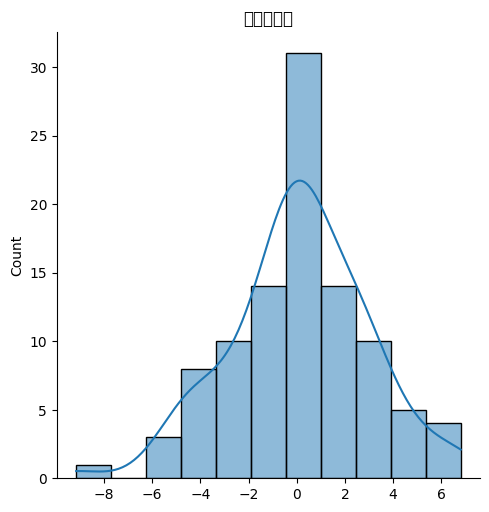

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.normal(0,  #loc：分布的均值，也就是分布的中心位置。
                        3,  #scale：分布的标准差，决定了分布的宽度，标准差越大，分布越分散。
                        100) #size：输出的形状，可以是单个数字表示输出随机数的数量，也可以是一个元组表示多维数组的形状。

# 画分布图
_bins=np.logspace(1, 8, 1,base=2)
print(_bins)
sns.displot(data,
            # bins=50,
            kde=True)
plt.title("数据分布图")

plt.show()

          amount label
0     104.045925    正常
1      83.971166    正常
2      86.319317    正常
3     129.721721    正常
4      81.930292    正常
...          ...   ...
1045  571.568387    异常
1046  459.381188    异常
1047  524.033721    异常
1048  502.778580    异常
1049  581.893516    异常

[1050 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

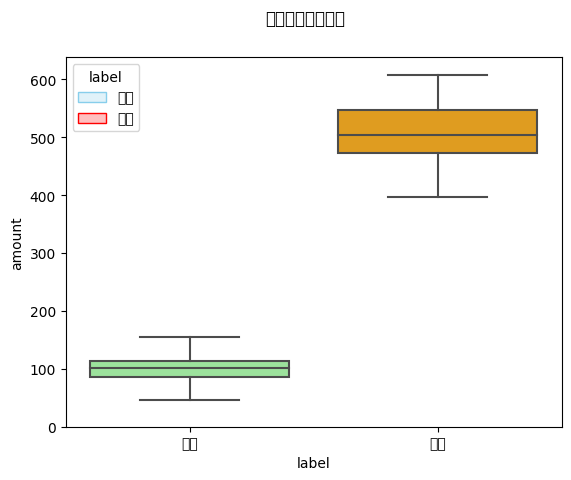

In [14]:
# 加载示例数据
df = pd.DataFrame({
    "amount": np.concatenate([np.random.normal(100, 20, 1000), np.random.normal(500, 50, 50)]),
    "label": ["正常"]*1000 + ["异常"]*50
})
print(df)
# 绘制组合图表
sns.histplot(data=df, x="amount", hue="label", kde=True, element="step", palette=["skyblue", "red"])
sns.boxplot(data=df, x="label", y="amount", showfliers=False, palette=["lightgreen", "orange"])
plt.subplots_adjust(wspace=0.3)
plt.suptitle("交易金额分布分析")
plt.show()

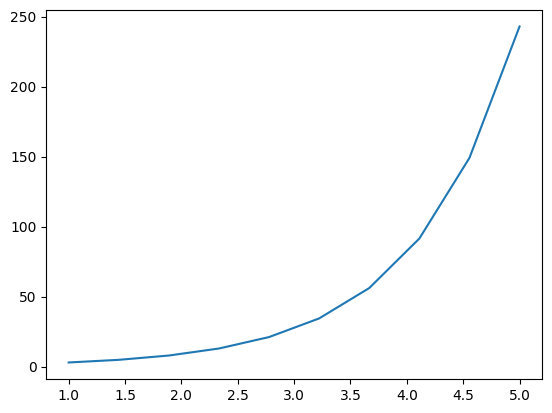

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 5,10) #创建一个包含10个元素的数组，这些元素均匀分布在1到5之间
y = np.logspace(1, 5,10,base=3) #创建一个包含10个元素的数组，这些元素均匀分布在2^1到2^5之间

plt.plot(x, y)
plt.show()

分箱边界: [17, 22.5, 29.5, 40.5, 49.5, 58.5, 70]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

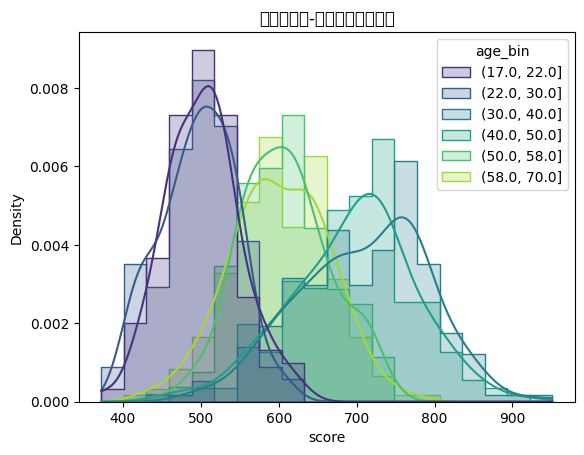

In [16]:
# 决策树分箱示例
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# 生成模拟数据（客户年龄与信用评分）
np.random.seed(42)
age = np.random.randint(18, 70, 1000)
score = np.where(age < 30, np.random.normal(500, 50, 1000),
                np.where(age < 50, np.random.normal(700, 80, 1000),
                        np.random.normal(600, 60, 1000)))
df = pd.DataFrame({'age': age, 'score': score})

# 决策树分箱（以age预测score）
X = df[['age']]
y = df['score']
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1)
dt.fit(X, y)

# 提取决策树分裂阈值
thresholds = np.sort(dt.tree_.threshold[dt.tree_.feature == 0])
bins = [df['age'].min()-1] + thresholds.tolist() + [df['age'].max()+1]

# 应用分箱
df['age_bin'] = pd.cut(df['age'], bins=bins, precision=0)
print("分箱边界:", bins)

# 可视化（带核密度曲线）
sns.histplot(data=df, x='score', hue='age_bin', 
             #binwidth = 10,  #bins宽度
            element='step', kde=True, palette='viridis',
            stat='density', common_norm=False)
plt.title('决策树分箱-信用评分分布对比')
plt.show()

In [17]:
# #卡方分箱示例
# import toad
# from sklearn.datasets import load_breast_cancer
# import seaborn as sns

# # 加载乳腺癌数据集
# data = load_breast_cancer()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# # 卡方分箱（针对'mean radius'特征）
# combiner = toad.transform.Combiner()
# combiner.fit(df[['mean radius', 'target']], 
#             df['target'], method='chi', 
#             min_samples=0.2,  # 最小样本比例
#             n_bins=5)         # 目标分箱数

# # 转换分箱结果
# df_trans = combiner.transform(df[['mean radius', 'target']])

# # 可视化分箱分布
# plt.figure(figsize=(12,6))
# sns.boxplot(x='mean radius_bin', y='target', data=df_trans,
#            palette='coolwarm', flierprops={'marker': 'x'})
# plt.xticks(rotation=30)
# plt.title('卡方分箱-肿瘤半径与恶性程度关系')
# plt.show()

# # 输出分箱统计
# print("卡方分箱统计表:\n", 
#      toad.metrics.KS_bucket(df_trans['target'], 
#                            df_trans['mean radius_bin']))